<a href="https://colab.research.google.com/github/yuwei-jpg/CourseSera_Practice/blob/main/ai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS4618_Assignment1_Predict Online Shopping Purchasing

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from seaborn import lmplot, stripplot,boxplot
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances

# read the dataset_shopping.csv.
df = pd.read_csv( "../dataset_shopping.csv")

# show the dimension of file.
df.shape

(12330, 18)

In [74]:
# show the different features.
df.columns

Index(['admin_num_pages', 'admin_duration', 'info_num_pages', 'info_duration',
       'prod_num_pages', 'prod_duration', 'bounce_rate', 'exit_rate',
       'page_value', 'special_day', 'month', 'operating_system', 'browser',
       'region', 'referrer', 'visitor', 'weekend', 'purchase'],
      dtype='object')

In [75]:
# show the datatypes.
df.dtypes

,0
admin_num_pages,int64
admin_duration,float64
info_num_pages,int64
info_duration,float64
prod_num_pages,int64
prod_duration,float64
bounce_rate,float64
exit_rate,float64
page_value,float64
special_day,float64


In [76]:
# The columns and datatypes (again) but also whether there are any nulls in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_num_pages   12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_num_pages    12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   prod_num_pages    12330 non-null  int64  
 5   prod_duration     12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   page_value        12330 non-null  float64
 9   special_day       12330 non-null  float64
 10  month             12330 non-null  object 
 11  operating_system  12330 non-null  int64  
 12  browser           12330 non-null  int64  
 13  region            12330 non-null  int64  
 14  referrer          12330 non-null  int64  
 15  visitor           12330 non-null  object 
 16  weekend           12330 non-null  bool  

In [77]:
# summary statistics
df.describe(include="all")

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


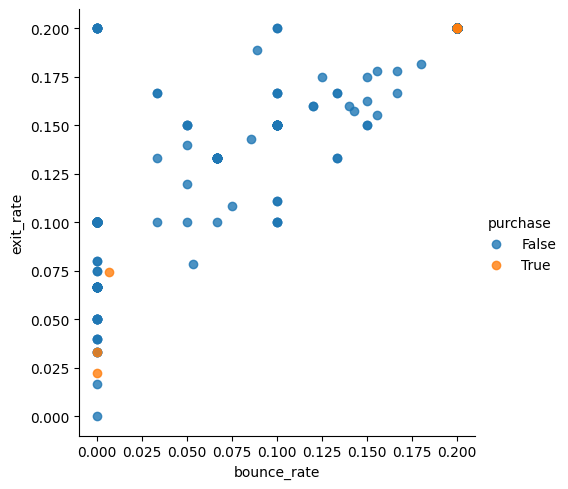

In [62]:
# The lower exit rate and bounce_rate, the more possible that the customer pruchases
plot = sns.lmplot(x="bounce_rate", y="exit_rate", hue="purchase", data=df, fit_reg=False)

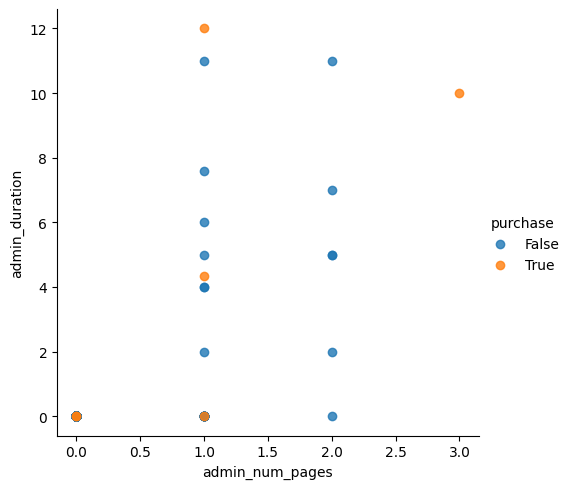

In [63]:
plot1 = sns.lmplot(x="admin_num_pages", y="admin_duration", hue="purchase", data=df, fit_reg=False)

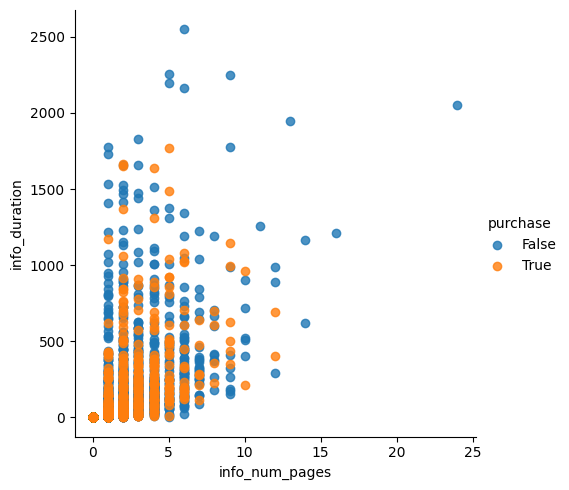

In [21]:
plot2 = sns.lmplot(x="info_num_pages", y="info_duration", hue="purchase", data=df, fit_reg=False)

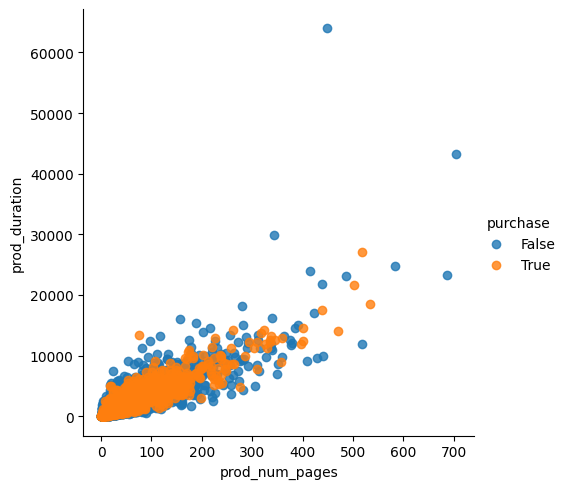

In [29]:
plot3 = sns.lmplot(x="prod_num_pages", y="prod_duration", hue="purchase", data=df, fit_reg=False)

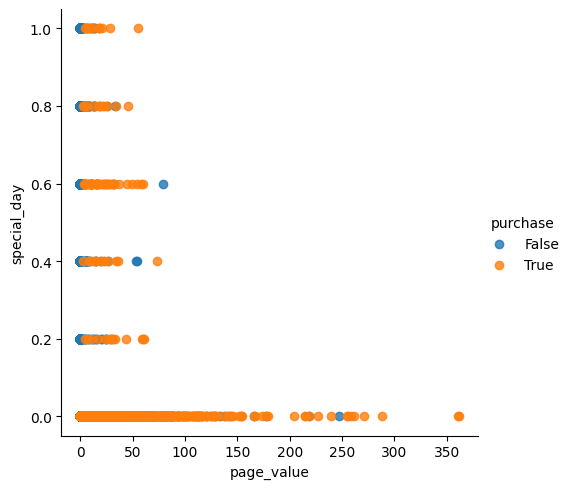

In [27]:
# It shows that customer seems to purchase mostly during none special day (not closer actually)
plot4 = sns.lmplot(x="page_value",y="special_day" ,hue="purchase", data=df, fit_reg=False)

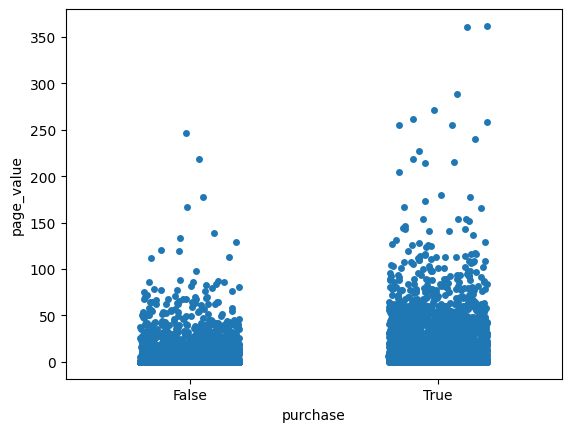

In [31]:
# It shows that there is no obvious relationship between pruchase and page value
plot = stripplot(x="purchase", y="page_value", data=df, jitter=0.2)

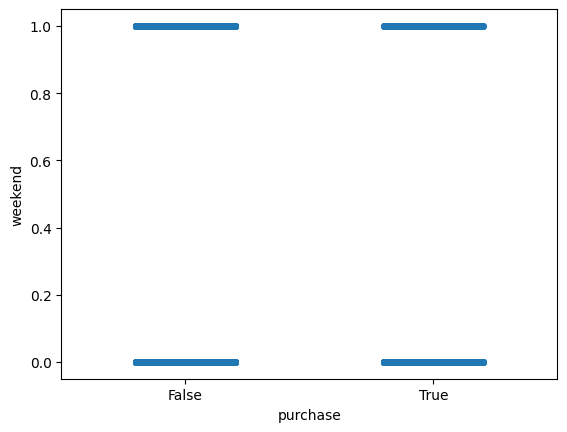

In [41]:
plot = stripplot(x="purchase", y="weekend", data=df, jitter=0.2)

### Using instance-based learning for classification

In [64]:
# The features (I deleted some of the features
# including month, page_value,visitor,weekend,operating system, browser, region, reffer)

features = ["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day"]

# Extract these features and convert to numpy 2D array
X = df[features].values

# Standardization of X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["purchase"])

In [65]:
# an odd k in kNN classification helps ensure a clear decision by reducing the possibility of ties in the majority voting process
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_scaled, y)

KNeighborsClassifier()

In [66]:
# wrap each value within a list to make them a sequence
customer_df = pd.DataFrame({"admin_num_pages":[5], "admin_duration":[10],"info_num_pages":[10],"info_duration":[2],"prod_num_pages":[3],"prod_duration":[1],
            "bounce_rate":[0.2],"exit_rate":[0.2],"special_day":[0]})

customer = customer_df.values

predict = knn.predict(customer)

label = label_encoder.inverse_transform(predict)

print("The rabel is",label[0])

The rabel is False


### Clean the data


In [83]:
features0=["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day","month","page_value","visitor","weekend","operating system", "browser", "region", "reffer"]


numeric_features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration",
                    "prod_num_pages", "prod_duration", "bounce_rate", "exit_rate",
                    "special_day", "page_value"]

nominal_features = ["month","visitor"]

df["weekend"] = df["weekend"].astype(int)

# using one-hot encoding
df = pd.get_dummies(df, columns=["operating_system", "browser", "region", "referrer"], drop_first=True)

# scaler = StandardScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])


KeyError: "None of [Index(['operating_system', 'browser', 'region', 'referrer'], dtype='object')] are in the [columns]"

In [ ]:
df = df[(df["admin_num_pages"] < 6) &
        (df["admin_duration"] < 12.5) &
        (df["info_num_pages"] <= 12.5) &
        (df["info_duration"] < 15) &
        (df["prod_num_pages"] < 12) &
        (df["prod_duration"] <= 20) &
        (df["bounce_rate"] < 3) &
        (df["page_value"] <= 17.5)].copy()

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the invalid data was filtered out
df.shape
df.head()

KeyboardInterrupt: 

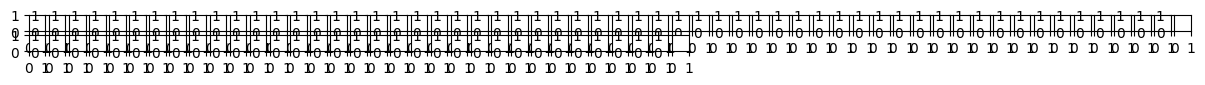

In [71]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

copy_df = dev_df.copy()

m = scatter_matrix(copy_df, figsize=(15, 15))